Credit:
- https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
root = '/content/drive/MyDrive/SSDD/JPEGImages/'
img = cv.imread(root + '/11.jpg',0)
equ = cv.equalizeHist(img)
blur = cv.GaussianBlur(equ,(3**2,3**2),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

In [17]:
# Output dtype = cv2.CV_8U
# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
laplacian = cv.Laplacian(blur,cv.CV_64F)
abs_dst = cv.convertScaleAbs(laplacian)

In [1]:
abs_dst / 255

NameError: ignored

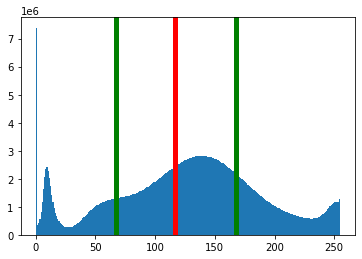

Line seperation is 100.84527407087309


In [10]:
ind1 = blur.ravel() > ret3
ind2 = blur.ravel() <= ret3
mean1 = np.mean(blur.ravel()[ind1])
mean2 = np.mean(blur.ravel()[ind2])
plt.axvline(x = ret3, color = 'red', lw = 5)
plt.axvline(x = mean1, color = 'green', lw = 5)
plt.axvline(x = mean2, color = 'green', lw = 5)
plt.hist(blur.ravel(),256)
plt.show()
print(f'Line seperation is {mean1 - mean2}')

In [6]:
crop = np.mod(th3 / 255 + 1, 2).astype('uint8')
cropped = crop * img

In [10]:
cropped.shape

(16000, 24000)

In [18]:
cv.imwrite(root + 'test.jpg', abs_dst)

True

In [ ]:
cv2_imshow(cv.vconcat([img, blur,  crop * 255]))

In [7]:
kernel = np.ones((5,5),np.uint8)
cv2_imshow(cv.morphologyEx(crop, cv.MORPH_CLOSE, kernel) * img)